# LSTM Midi Generator

https://arxiv.org/abs/1810.12247
```
@inproceedings{
  hawthorne2018enabling,
  title={Enabling Factorized Piano Music Modeling and Generation with the {MAESTRO} Dataset},
  author={Curtis Hawthorne and Andriy Stasyuk and Adam Roberts and Ian Simon and Cheng-Zhi Anna Huang and Sander Dieleman and Erich Elsen and Jesse Engel and Douglas Eck},
  booktitle={International Conference on Learning Representations},
  year={2019},
  url={https://openreview.net/forum?id=r1lYRjC9F7},
}
```

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import midichar

--> 42 1.263156 1.4210504999999998 64
--> 42 1.8947339999999997 2.0526285 64
--> 42 2.526312 2.6842064999999997 55
--> 82 2.526312 2.6842064999999997 68
--> 42 2.6842064999999997 2.8421009999999995 57
--> 82 2.6842064999999997 2.8421009999999995 58
--> 42 2.8421009999999995 2.9999955 51
--> 82 2.8421009999999995 2.9999955 49
--> 42 2.9999955 3.1578899999999996 57
--> 82 2.9999955 3.1578899999999996 40
--> 61 2.9999955 3.1578899999999996 105
--> 42 3.1578899999999996 3.3157844999999995 52
--> 82 3.1578899999999996 3.3157844999999995 67
--> 42 3.3157844999999995 3.4736789999999997 57
--> 82 3.3157844999999995 3.4736789999999997 58
--> 61 3.3157844999999995 3.4736789999999997 113
--> 42 3.4736789999999997 3.6315734999999996 46
--> 82 3.4736789999999997 3.6315734999999996 48
--> 42 3.6315734999999996 3.7894679999999994 57
--> 82 3.6315734999999996 3.7894679999999994 39
--> 82 3.7894679999999994 3.9473624999999997 67
--> 42 3.7894679999999994 3.9473624999999997 57
--> 42 3.9473624999999997 

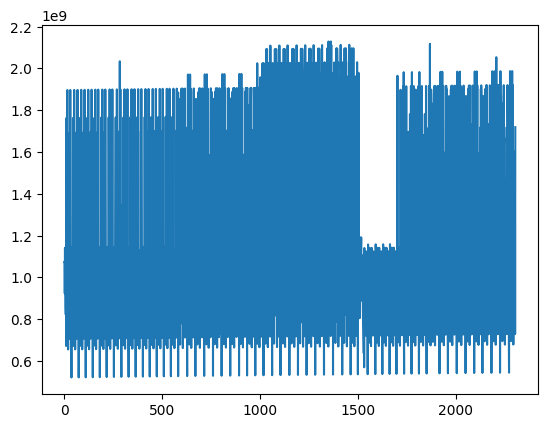

In [2]:
ITEM_SIZE=2304 #(48)

enc = midichar.encode_midi(
    # midi_file="datasets/lmd_full/0/0a0b59b984e78fccd380b44938a17ad4.mid",
    midi_file="datasets/lmd_full/0/0a0c8865e48111d4359a3337fc574eb8.mid",
    window_size=ITEM_SIZE)

plt.plot(enc)
# enc

48 2304


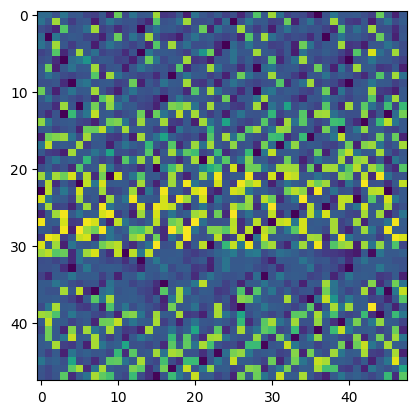

In [3]:
import math
sqr = int(math.sqrt(ITEM_SIZE))
print(sqr, ITEM_SIZE)
plt.imshow(np.reshape(enc, (-1,sqr))) # , interpolation='nearest')

- $S_1$ the step. The distance in time from the previous note
- $D_1$ the duration of the note
- $P_1$ the pitch of the note (C1, D#4, etc)
- $V_1$ the velocity of the note

- $B$ bin size (127)
- $S_2$ the encoded step
- $D_2$ the encoded duration

**Step Encoding and Decoding**

$$ S_2 = B\frac{S_1}{100} $$
$$ S_1 = 100\frac{S_2}{B} $$

**Duration Encoding and Decoding**

$$ D_2 = BD_1100 $$
$$ D_1 = \frac{D_2}{B100} $$


In [4]:
midichar.decode_midi(enc, "test.mid")

--> 42 1.1764705882352942 1.1764705882352942 64
--> 42 1.5686274509803921 1.9607843137254901 64
--> 42 2.3529411764705883 2.3529411764705883 55
--> 82 2.3529411764705883 2.3529411764705883 68
--> 42 2.3529411764705883 2.7450980392156863 57
--> 82 2.3529411764705883 2.7450980392156863 58
--> 42 2.7450980392156863 2.7450980392156863 51
--> 82 2.7450980392156863 2.7450980392156863 49
--> 42 2.7450980392156863 3.1372549019607843 57
--> 82 2.7450980392156863 3.1372549019607843 40
--> 61 2.7450980392156863 3.1372549019607843 105
--> 42 3.1372549019607843 3.1372549019607843 52
--> 82 3.1372549019607843 3.1372549019607843 67
--> 42 3.1372549019607843 3.1372549019607843 57
--> 82 3.1372549019607843 3.1372549019607843 58
--> 61 3.1372549019607843 3.1372549019607843 113
--> 42 3.1372549019607843 3.5294117647058822 46
--> 82 3.1372549019607843 3.5294117647058822 48
--> 42 3.5294117647058822 3.5294117647058822 57
--> 82 3.5294117647058822 3.5294117647058822 39
--> 82 3.5294117647058822 3.9215686274